<a href="https://colab.research.google.com/github/juan-jm90/ariranhatech/blob/main/Hospital_Toti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import sqlite3

# create a connection object to connect to the database
conn = sqlite3.connect('example.db')

# create a cursor object to execute SQL queries
cursor = conn.cursor()

# define the SQL queries as a multiline string
sql = '''
    CREATE TABLE IF NOT EXISTS Physician (
  EmployeeID INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Position TEXT NOT NULL,
  SSN INTEGER NOT NULL
); 

CREATE TABLE IF NOT EXISTS Department (
  DepartmentID INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Head INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID)
);

CREATE TABLE IF NOT EXISTS Affiliated_With (
  Physician INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID),
  Department INTEGER NOT NULL
    CONSTRAINT fk_Department_DepartmentID REFERENCES Department(DepartmentID),
  PrimaryAffiliation BOOLEAN NOT NULL,
  PRIMARY KEY(Physician, Department)
);

CREATE TABLE IF NOT EXISTS Procedure (
  Code INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Cost REAL NOT NULL
);

CREATE TABLE IF NOT EXISTS Trained_In (
  Physician INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID),
  Treatment INTEGER NOT NULL
    CONSTRAINT fk_Procedure_Code REFERENCES Procedure(Code),
  CertificationDate DATETIME NOT NULL,
  CertificationExpires DATETIME NOT NULL,
  PRIMARY KEY(Physician, Treatment)
);

CREATE TABLE IF NOT EXISTS Patient (
  SSN INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Address TEXT NOT NULL,
  Phone TEXT NOT NULL,
  InsuranceID INTEGER NOT NULL,
  PCP INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID)
);

CREATE TABLE IF NOT EXISTS Nurse (
  EmployeeID INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Position TEXT NOT NULL,
  Registered BOOLEAN NOT NULL,
  SSN INTEGER NOT NULL
);

CREATE TABLE IF NOT EXISTS Appointment (
  AppointmentID INTEGER PRIMARY KEY NOT NULL,
  Patient INTEGER NOT NULL
    CONSTRAINT fk_Patient_SSN REFERENCES Patient(SSN),
  PrepNurse INTEGER
    CONSTRAINT fk_Nurse_EmployeeID REFERENCES Nurse(EmployeeID),
  Physician INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID),
  Start DATETIME NOT NULL,
  End DATETIME NOT NULL,
  ExaminationRoom TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS Medication (
  Code INTEGER PRIMARY KEY NOT NULL,
  Name TEXT NOT NULL,
  Brand TEXT NOT NULL,
  Description TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS Prescribes (
  Physician INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID),
  Patient INTEGER NOT NULL
    CONSTRAINT fk_Patient_SSN REFERENCES Patient(SSN),
  Medication INTEGER NOT NULL
    CONSTRAINT fk_Medication_Code REFERENCES Medication(Code),
  Date DATETIME NOT NULL,
  Appointment INTEGER
    CONSTRAINT fk_Appointment_AppointmentID REFERENCES Appointment(AppointmentID),
  Dose TEXT NOT NULL,
  PRIMARY KEY(Physician, Patient, Medication, Date)
);

CREATE TABLE IF NOT EXISTS Block (
  Floor INTEGER NOT NULL,
  Code INTEGER NOT NULL,
  PRIMARY KEY(Floor, Code)
); 

CREATE TABLE IF NOT EXISTS Room (
  Number INTEGER PRIMARY KEY NOT NULL,
  Type TEXT NOT NULL,
  BlockFloor INTEGER NOT NULL,
  BlockCode INTEGER NOT NULL,
  Unavailable BOOLEAN NOT NULL,
  FOREIGN KEY(BlockFloor, BlockCode) REFERENCES Block
);

CREATE TABLE IF NOT EXISTS On_Call (
  Nurse INTEGER NOT NULL
    CONSTRAINT fk_Nurse_EmployeeID REFERENCES Nurse(EmployeeID),
  BlockFloor INTEGER NOT NULL,
  BlockCode INTEGER NOT NULL,
  Start DATETIME NOT NULL,
  End DATETIME NOT NULL,
  PRIMARY KEY(Nurse, BlockFloor, BlockCode, Start, End),
  FOREIGN KEY(BlockFloor, BlockCode) REFERENCES Block
);

CREATE TABLE IF NOT EXISTS Stay (
  StayID INTEGER PRIMARY KEY NOT NULL,
  Patient INTEGER NOT NULL
    CONSTRAINT fk_Patient_SSN REFERENCES Patient(SSN),
  Room INTEGER NOT NULL
    CONSTRAINT fk_Room_Number REFERENCES Room(Number),
  Start DATETIME NOT NULL,
  End DATETIME NOT NULL
);

CREATE TABLE IF NOT EXISTS Undergoes (
  Patient INTEGER NOT NULL
    CONSTRAINT fk_Patient_SSN REFERENCES Patient(SSN),
  Procedure INTEGER NOT NULL
    CONSTRAINT fk_Procedure_Code REFERENCES Procedure(Code),
  Stay INTEGER NOT NULL
    CONSTRAINT fk_Stay_StayID REFERENCES Stay(StayID),
  Date DATETIME NOT NULL,
  Physician INTEGER NOT NULL
    CONSTRAINT fk_Physician_EmployeeID REFERENCES Physician(EmployeeID),
  AssistingNurse INTEGER
    CONSTRAINT fk_Nurse_EmployeeID REFERENCES Nurse(EmployeeID),
  PRIMARY KEY(Patient, Procedure, Stay, Date)
);
INSERT INTO Physician VALUES(1,'John Dorian','Staff Internist',111111111) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(2,'Elliot Reid','Attending Physician',222222222) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(3,'Christopher Turk','Surgical Attending Physician',333333333) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(4,'Percival Cox','Senior Attending Physician',444444444) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(5,'Bob Kelso','Head Chief of Medicine',555555555) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(6,'Todd Quinlan','Surgical Attending Physician',666666666) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(7,'John Wen','Surgical Attending Physician',777777777) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(8,'Keith Dudemeister','MD Resident',888888888) ON CONFLICT DO NOTHING;
INSERT INTO Physician VALUES(9,'Molly Clock','Attending Psychiatrist',999999999) ON CONFLICT DO NOTHING;

INSERT INTO Department VALUES(1,'General Medicine',4) ON CONFLICT DO NOTHING;
INSERT INTO Department VALUES(2,'Surgery',7) ON CONFLICT DO NOTHING;
INSERT INTO Department VALUES(3,'Psychiatry',9) ON CONFLICT DO NOTHING;

INSERT INTO Affiliated_With VALUES(1,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(2,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(3,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(3,2,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(4,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(5,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(6,2,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(7,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(7,2,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(8,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Affiliated_With VALUES(9,3,1) ON CONFLICT DO NOTHING;

INSERT INTO Procedure VALUES(1,'Reverse Rhinopodoplasty',1500.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(2,'Obtuse Pyloric Recombobulation',3750.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(3,'Folded Demiophtalmectomy',4500.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(4,'Complete Walletectomy',10000.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(5,'Obfuscated Dermogastrotomy',4899.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(6,'Reversible Pancreomyoplasty',5600.0) ON CONFLICT DO NOTHING;
INSERT INTO Procedure VALUES(7,'Follicular Demiectomy',25.0) ON CONFLICT DO NOTHING;

INSERT INTO Patient VALUES(100000001,'John Smith','42 Foobar Lane','555-0256',68476213,1) ON CONFLICT DO NOTHING;
INSERT INTO Patient VALUES(100000002,'Grace Ritchie','37 Snafu Drive','555-0512',36546321,2) ON CONFLICT DO NOTHING;
INSERT INTO Patient VALUES(100000003,'Random J. Patient','101 Omgbbq Street','555-1204',65465421,2) ON CONFLICT DO NOTHING;
INSERT INTO Patient VALUES(100000004,'Dennis Doe','1100 Foobaz Avenue','555-2048',68421879,3) ON CONFLICT DO NOTHING;

INSERT INTO Nurse VALUES(101,'Carla Espinosa','Head Nurse',1,111111110) ON CONFLICT DO NOTHING;
INSERT INTO Nurse VALUES(102,'Laverne Roberts','Nurse',1,222222220) ON CONFLICT DO NOTHING;
INSERT INTO Nurse VALUES(103,'Paul Flowers','Nurse',0,333333330) ON CONFLICT DO NOTHING;

INSERT INTO Appointment VALUES(13216584,100000001,101,1,'2008-04-24 10:00','2008-04-24 11:00','A') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(26548913,100000002,101,2,'2008-04-24 10:00','2008-04-24 11:00','B') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(36549879,100000001,102,1,'2008-04-25 10:00','2008-04-25 11:00','A') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(46846589,100000004,103,4,'2008-04-25 10:00','2008-04-25 11:00','B') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(59871321,100000004,NULL,4,'2008-04-26 10:00','2008-04-26 11:00','C') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(69879231,100000003,103,2,'2008-04-26 11:00','2008-04-26 12:00','C') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(76983231,100000001,NULL,3,'2008-04-26 12:00','2008-04-26 13:00','C') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(86213939,100000004,102,9,'2008-04-27 10:00','2008-04-21 11:00','A') ON CONFLICT DO NOTHING;
INSERT INTO Appointment VALUES(93216548,100000002,101,2,'2008-04-27 10:00','2008-04-27 11:00','B') ON CONFLICT DO NOTHING;

INSERT INTO Medication VALUES(1,'Procrastin-X','X','N/A') ON CONFLICT DO NOTHING;
INSERT INTO Medication VALUES(2,'Thesisin','Foo Labs','N/A') ON CONFLICT DO NOTHING;
INSERT INTO Medication VALUES(3,'Awakin','Bar Laboratories','N/A') ON CONFLICT DO NOTHING;
INSERT INTO Medication VALUES(4,'Crescavitin','Baz Industries','N/A') ON CONFLICT DO NOTHING;
INSERT INTO Medication VALUES(5,'Melioraurin','Snafu Pharmaceuticals','N/A') ON CONFLICT DO NOTHING;

INSERT INTO Prescribes VALUES(1,100000001,1,'2008-04-24 10:47',13216584,'5') ON CONFLICT DO NOTHING;
INSERT INTO Prescribes VALUES(9,100000004,2,'2008-04-27 10:53',86213939,'10') ON CONFLICT DO NOTHING;
INSERT INTO Prescribes VALUES(9,100000004,2,'2008-04-30 16:53',NULL,'5') ON CONFLICT DO NOTHING;

INSERT INTO Block VALUES(1,1) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(1,2) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(1,3) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(2,1) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(2,2) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(2,3) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(3,1) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(3,2) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(3,3) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(4,1) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(4,2) ON CONFLICT DO NOTHING;
INSERT INTO Block VALUES(4,3) ON CONFLICT DO NOTHING;

INSERT INTO Room VALUES(101,'Single',1,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(102,'Single',1,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(103,'Single',1,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(111,'Single',1,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(112,'Single',1,2,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(113,'Single',1,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(121,'Single',1,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(122,'Single',1,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(123,'Single',1,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(201,'Single',2,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(202,'Single',2,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(203,'Single',2,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(211,'Single',2,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(212,'Single',2,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(213,'Single',2,2,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(221,'Single',2,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(222,'Single',2,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(223,'Single',2,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(301,'Single',3,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(302,'Single',3,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(303,'Single',3,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(311,'Single',3,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(312,'Single',3,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(313,'Single',3,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(321,'Single',3,3,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(322,'Single',3,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(323,'Single',3,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(401,'Single',4,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(402,'Single',4,1,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(403,'Single',4,1,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(411,'Single',4,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(412,'Single',4,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(413,'Single',4,2,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(421,'Single',4,3,1) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(422,'Single',4,3,0) ON CONFLICT DO NOTHING;
INSERT INTO Room VALUES(423,'Single',4,3,0) ON CONFLICT DO NOTHING;

INSERT INTO On_Call VALUES(101,1,1,'2008-11-04 11:00','2008-11-04 19:00') ON CONFLICT DO NOTHING;
INSERT INTO On_Call VALUES(101,1,2,'2008-11-04 11:00','2008-11-04 19:00') ON CONFLICT DO NOTHING;
INSERT INTO On_Call VALUES(102,1,3,'2008-11-04 11:00','2008-11-04 19:00') ON CONFLICT DO NOTHING;
INSERT INTO On_Call VALUES(103,1,1,'2008-11-04 19:00','2008-11-05 03:00') ON CONFLICT DO NOTHING;
INSERT INTO On_Call VALUES(103,1,2,'2008-11-04 19:00','2008-11-05 03:00') ON CONFLICT DO NOTHING;
INSERT INTO On_Call VALUES(103,1,3,'2008-11-04 19:00','2008-11-05 03:00') ON CONFLICT DO NOTHING;

INSERT INTO Stay VALUES(3215,100000001,111,'2008-05-01','2008-05-04') ON CONFLICT DO NOTHING;
INSERT INTO Stay VALUES(3216,100000003,123,'2008-05-03','2008-05-14') ON CONFLICT DO NOTHING;
INSERT INTO Stay VALUES(3217,100000004,112,'2008-05-02','2008-05-03') ON CONFLICT DO NOTHING;

INSERT INTO Undergoes VALUES(100000001,6,3215,'2008-05-02',3,101) ON CONFLICT DO NOTHING;
INSERT INTO Undergoes VALUES(100000001,2,3215,'2008-05-03',7,101) ON CONFLICT DO NOTHING;
INSERT INTO Undergoes VALUES(100000004,1,3217,'2008-05-07',3,102) ON CONFLICT DO NOTHING;
INSERT INTO Undergoes VALUES(100000004,5,3217,'2008-05-09',6,NULL) ON CONFLICT DO NOTHING;
INSERT INTO Undergoes VALUES(100000001,7,3217,'2008-05-10',7,101) ON CONFLICT DO NOTHING;
INSERT INTO Undergoes VALUES(100000004,4,3217,'2008-05-13',3,103) ON CONFLICT DO NOTHING;

INSERT INTO Trained_In VALUES(3,1,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(3,2,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(3,5,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(3,6,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(3,7,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(6,2,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(6,5,'2007-01-01','2007-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(6,6,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,1,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,2,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,3,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,4,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,5,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,6,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;
INSERT INTO Trained_In VALUES(7,7,'2008-01-01','2008-12-31') ON CONFLICT DO NOTHING;

'''

# execute the SQL queries
cursor.executescript(sql)

# commit the changes
conn.commit()




In [32]:
import pandas as pd

df = pd.read_sql('''SELECT
  P.EmployeeID AS ProfessionalID,
  P.Name AS ProfessionalName,
  COUNT(Pr.Patient) AS PatientCount
FROM
  Physician P
LEFT JOIN
  Prescribes Pr ON P.EmployeeID = Pr.Physician
LEFT JOIN
  Undergoes U ON P.EmployeeID = U.Physician
GROUP BY
  P.EmployeeID, P.Name;''', conn)

print(df)



   ProfessionalID   ProfessionalName  PatientCount
0               1        John Dorian             1
1               2        Elliot Reid             0
2               3   Christopher Turk             0
3               4       Percival Cox             0
4               5          Bob Kelso             0
5               6       Todd Quinlan             0
6               7           John Wen             0
7               8  Keith Dudemeister             0
8               9        Molly Clock             2


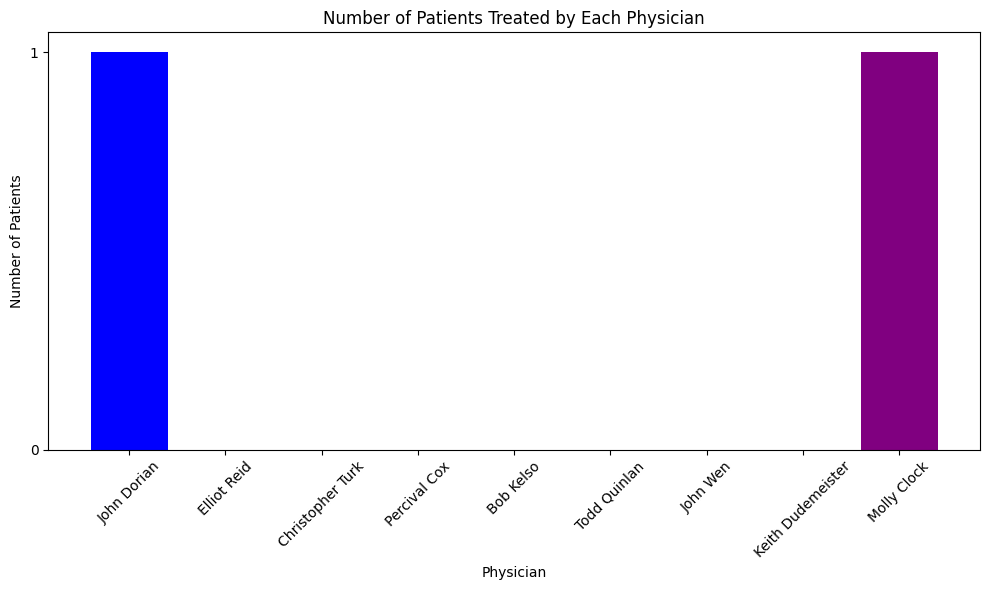

In [28]:
import matplotlib.pyplot as plt



# Execute the query to retrieve the data
query = '''
SELECT
  P.EmployeeID AS ProfessionalID,
  P.Name AS ProfessionalName,
  COUNT(DISTINCT Pr.Patient) AS PatientCount
FROM
  Physician P
LEFT JOIN
  Prescribes Pr ON P.EmployeeID = Pr.Physician
LEFT JOIN
  Undergoes U ON P.EmployeeID = U.Physician
GROUP BY
  P.EmployeeID, P.Name;
'''
cursor.execute(query)
results = cursor.fetchall()

# Extract the data from the results
physician_ids = []
physician_names = []
patient_counts = []
for row in results:
    physician_ids.append(row[0])
    physician_names.append(row[1])
    patient_counts.append(row[2])


# Create the bar plot
plt.figure(figsize=(10, 6))
bar_colors = ['blue', 'green', 'red', 'purple', 'orange']  # Define custom colors
plt.bar(physician_names, patient_counts, color=bar_colors)
plt.xlabel('Physician')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Treated by Each Physician')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Display only integers on y-axis

# Display the plot
plt.tight_layout()
plt.show()
